# Statistics for data science and measurement
## Babak Moghadas 1 and Brian Caffo 1, 2
### 1 Department of Biostatistics 
### 2 Department of Biomedical Engineering
### Bloomberg School of Public Health
### Johns Hopkins University

## About these slides

+ Goal is the least that you need to know
+ All slides are created in Jupyter notebooks - free to use and open source
+ [Github repo](https://github.com/smart-stats/odsc_2023)
+ [pyglide](https://pypi.org/project/pyglide/) provides the interactivity

## Part 2 Measurement

### Measurement

+ Key principle: repeatability - if you measure a subject twice do you get the same value
+ Key principle in measuring repeatability: compare intra-subject variation to inter-subject variation
+ Repeatability is relatively easy to measure, since we can take technical replicates
+ Repeatability does not measure validity, the extent to which a measure actually measures what it's reported to

In [ ]:
## Code used to generate figures
import part2_code

#### Low inter-subject variability to intra-subject variability

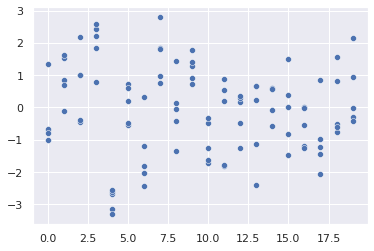

In [2]:
part2_code.measurement1()

#### High inter-subject variability to intra-subject variability

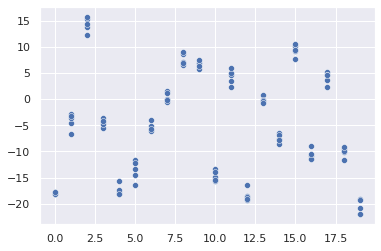

In [3]:
part2_code.measurement2()

### ICC
+ The intra-class correlation coefficient is a measure of repeatability
$$ 
ICC = \frac{Inter}{Total} = \frac{Inter}{Inter + Intra}
$$
+ ICC is the proportion of the total variability that is inter-subject
+ Note the inter-subject varability is dependent on the sample characteristics
   + Suppose older subjects tend to have higher mean values
   + A sample of older and younger subjects will have more inter-subject variability than one of just older subjects or just younger subjects alone

#### Estimation

+ Usually estimation follows by random effect models; we'll show the basics

$$
Y_{ij} = U_i + \epsilon_{ij}
$$

+ $i$ = subject; $j$ = measurement within subject (assume $j=1,2$)
+ $U_i$ is the effect of subject $i$; variation in $U_i$ is inter-subject variation, $\sigma^2_u$
+ $\epsilon_{ij}$ is the error; variation in $\epsilon_{ij}$ is intra-subject variation, $\sigma^2$

#### Estimation continued
+ Notice that: 
   $$Y_{i2} - Y_{i1} = \epsilon_{i2} - \epsilon_{i1}$$
+ Implying
   $$Var(Y_{i2} - Y_{i1}) = 2\sigma^2$$
+ And also that: 
   $$\frac{1}{2}(Y_{i2} + Y_{i1}) = U_i + \frac{1}{2}(\epsilon_{i2} + \epsilon_{i1})$$
+ Implying
   $$Var\left[\frac{1}{2}(Y_{i2} + Y_{i1})\right] = \sigma_u^2 + \frac{\sigma^2}{2}$$

#### Estimation continued

+ So we can get: 
    $$\frac{1}{2} Var(Y_{i2} - Y_{i1}) = \sigma^2$$
+ And : 
    $$Var\left[(\frac{1}{2}(Y_{i2} + Y_{i1})\right] - \frac{\sigma^2}{2} = \sigma^2_u$$

In [17]:
##### Numerical example
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],axis = 1)
df = df.loc[(df['type'] == 1) & (df['level'] == 1)]
df = df.pivot(index = 'id', columns = 'roi', values = 'volume')
df
df.head(4)

roi,CSF,Diencephalon_L,Diencephalon_R,Mesencephalon,Metencephalon,Myelencephalon,Telencephalon_L,Telencephalon_R
id,,,,,,,,
127,109776,9683,9678,10268,159402,4973,531111,543404
142,107334,9156,9071,10516,165803,4912,545603,552216
239,94254,8937,9004,9070,124504,4023,483107,490805
346,67156,8828,8933,9788,135090,4428,558849,568830


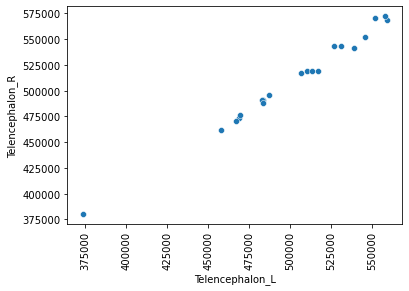

In [19]:
sns.scatterplot(x = 'Telencephalon_L', y = 'Telencephalon_R', data = df)
plt.xticks(rotation = 90);

In [43]:
sigmasq = np.var(df['Telencephalon_L'] - df['Telencephalon_R'])
sigmausq = np.var(0.5 * df['Telencephalon_L'] + 0.5 * df['Telencephalon_L']) - sigmasq / 2
print(sigmausq / (sigmasq + sigmausq) * 100)

98.94017974562621


#### Notes
+ This is not how one typically estimates ICC anymore; mixed models are typically used
+ The subtraction can result in a negative variance estimate

#### Example of repeatability studies
+ In functional brain imaging one typically looks at the correlation in activity over time between brain regions
+ These sets of correlations estimate how different areas of the brain coordinate
+ Finn et al. (Nature Neuroscience 2015) used brain connectivity as a "fingerprint"
  + They took pairs of measurements for subjects and found which measurements were the closest
  + The count of the number of instances where a subject matched to themselves is a repeatability 
    metric. They called it the "functional connectome fingerprint"

#### Fun fact
+ In 1713 Montmort published his letters with Nicholaus Bernoulli 
+ In them he demonstrated that under independence, i.e. that fingerprints are being matched only by chance, the number of matches follows what is now called Montmort's matching distribution
+ This distribution limits to a Poisson(1)
+ Wang (2021, Canadian Journal of Statistics) showed that any reasonable matching strategy also limits to a Poisson(1)
+ The convergence is quite fast

![Picture of Montmort](assets/Montmort.jpeg)

[Coutesy of MacTutor](https://mathshistory.st-andrews.ac.uk/Biographies/Montmort/)

![twin study](assets/figure_5_twin.png)

Courtesy of Wang et al. (2021 Canadian Journal of Statistics)

![Brain regions](assets/figure_8.png)

Courtesy of Wang et al. (2021 Canadian Journal of Statistics)

### Validity

+ Repeatability is not a measure of validity, that a construct measures what it purports to
+ Repeatability is easy to measure, since we can collect technical replicates, observe units over short periods of time and so on
+ Validity is often hard because the measurement we'd like to validate is the current best measure of the thing we'd like to estimate!

#### Things to try

+ In the absence of a measurment gold standard, the statistical proceduer I find most useful is  **Predictive validity**: is the measurement associated with outcomes that it should be?
+ Also useful, **concurrent validity** is the measurement correlated with other measures of the target?
+ Example: in a poor country where child ages are hard to determine due to poor record keeping an image based DL algorithm is used to estimate age. 
  + Repeatability - take different pictures of the same subject, do the predicted ages agree?
  + Predictive validity - does the estimated age predict developmental milestones at roughly the right time
  + Concurrent validity - is the estimated age correlated with height, weight and other measures of size